In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
db = pd.read_csv(r"C:\Users\PuruGupta\Documents\Kaggle\e_commerce\data.csv",encoding='unicode_escape')
db.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
db['InvoiceDate'] = pd.to_datetime(db['InvoiceDate'])
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
db.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
print("Lets drop all the NULL values from CustomerID\n____________________________")
db1 = db.dropna(subset='CustomerID')
db1.isnull().sum()

Lets drop all the NULL values from CustomerID
____________________________


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
print("There are a total of", len(db['Country'].unique()), "Countries present in our data")
print("Which are as follows \n__________________________________")

db1['Country'].unique()


There are a total of 38 Countries present in our data
Which are as follows 
__________________________________


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [12]:
print("Lets figure out the number of invoices for each country\n_______________________________________________")
db1.groupby(['Country']).size()


Lets figure out the number of invoices for each country
_______________________________________________


Country
Australia                 1259
Austria                    401
Bahrain                     17
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      7485
European Community          61
Finland                    695
France                    8491
Germany                   9495
Greece                     146
Iceland                    182
Israel                     250
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1480
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533
Sweden                     462


In [13]:
print("We can see that there are 244 entries which doesn't have any countries information\nLet's drop such entries as well\n___________________________________________________________________")
db2 = db1[db1['Country'] != 'Unspecified']

db2.groupby(['Country']).size()


We can see that there are 244 entries which doesn't have any countries information
Let's drop such entries as well
___________________________________________________________________


Country
Australia                 1259
Austria                    401
Bahrain                     17
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      7485
European Community          61
Finland                    695
France                    8491
Germany                   9495
Greece                     146
Iceland                    182
Israel                     250
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1480
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533
Sweden                     462


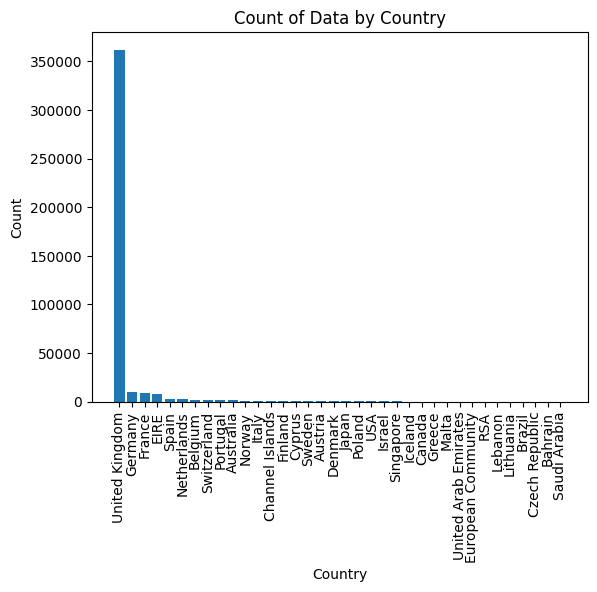

In [14]:
cntry = db2.groupby(['Country']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
plt.bar(cntry['Country'],cntry['Count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Data by Country')
plt.xticks(rotation=90)
plt.show()
#cntry.plot(kind = 

In [17]:
print("Considering that most of the sales goes in UK, we'll keep our discussion restricted to UK only for now")
db3 = db2[db2['Country']=='United Kingdom']
#db3 = db3[db3['Sales']>=0]
db3.head()

Considering that most of the sales goes in UK, we'll keep our discussion restricted to UK only for now


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Total month wise sales is as follows
_______________________________________________________


C:\Users\PuruGupta\AppData\Local\Temp\ipykernel_26464\2706093841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db3['Month'] = db3['InvoiceDate'].dt.month
C:\Users\PuruGupta\AppData\Local\Temp\ipykernel_26464\2706093841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db3['Sales'] = db3['Quantity']*db3['UnitPrice']


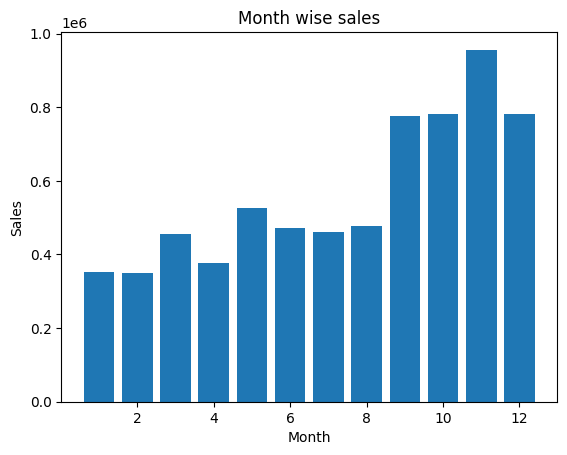

In [18]:
print("Total month wise sales is as follows\n_______________________________________________________")
db3['Month'] = db3['InvoiceDate'].dt.month
db3['Sales'] = db3['Quantity']*db3['UnitPrice']
month_wise_sales = db3.groupby('Month')['Sales'].sum().reset_index()
plt.bar(month_wise_sales['Month'],month_wise_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Month wise sales')
plt.show()

In [19]:
db3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [20]:
top_prod_sold = db3.groupby('Description').size().reset_index()
top_prod_sold.rename(columns={0:'Count'}, inplace=True)
top_prod_sold.sort_values(by='Count',ascending=False, inplace=True)
top_1000_prod = top_prod_sold.head(20)
top_1000_prod

,Description,Count
3681,WHITE HANGING HEART T-LIGHT HOLDER,1980
2751,REGENCY CAKESTAND 3 TIER,1574
1756,JUMBO BAG RED RETROSPOT,1505
214,ASSORTED COLOUR BIRD ORNAMENT,1343
2334,PARTY BUNTING,1327
1937,LUNCH BAG RED RETROSPOT,1185
2982,SET OF 3 CAKE TINS PANTRY DESIGN,1080
1929,LUNCH BAG BLACK SKULL.,1069
2302,PAPER CHAIN KIT 50'S CHRISTMAS,991
2126,NATURAL SLATE HEART CHALKBOARD,968


In [21]:
top_sales = db3.groupby('Description').sum('Sales').reset_index()
top_sales = top_sales[['Description','Sales']]
top_sales.sort_values(by='Sales', ascending=False,inplace=True)
top_sales = top_sales.head(20)
top_sales

,Description,Sales
2751,REGENCY CAKESTAND 3 TIER,103122.85
3681,WHITE HANGING HEART T-LIGHT HOLDER,88313.95
1756,JUMBO BAG RED RETROSPOT,75416.67
2334,PARTY BUNTING,61952.58
214,ASSORTED COLOUR BIRD ORNAMENT,52314.87
720,CHILLI LIGHTS,45155.61
2383,PICNIC BASKET WICKER 60 PIECES,39619.50
2302,PAPER CHAIN KIT 50'S CHRISTMAS,39596.73
371,BLACK RECORD COVER FRAME,37799.42
3729,WOOD BLACK BOARD ANT WHITE FINISH,33408.76


In [68]:
print("Products which have maximum sales as well as are sold most of the times\n_________________________________________")
new = top_sales.merge(top_1000_prod, on='Description', how='inner')
new

Products which have maximum sales as well as are sold most of the times
_________________________________________


,Description,Sales,Count
0,REGENCY CAKESTAND 3 TIER,103122.85,1574
1,WHITE HANGING HEART T-LIGHT HOLDER,88313.95,1980
2,JUMBO BAG RED RETROSPOT,75416.67,1505
3,PARTY BUNTING,61952.58,1327
4,ASSORTED COLOUR BIRD ORNAMENT,52314.87,1343
5,PAPER CHAIN KIT 50'S CHRISTMAS,39596.73,991
6,JUMBO BAG PINK POLKADOT,32608.17,844
7,SPOTTY BUNTING,29685.54,932
8,HEART OF WICKER SMALL,27353.59,963
9,SET OF 3 CAKE TINS PANTRY DESIGN,24630.20,1080


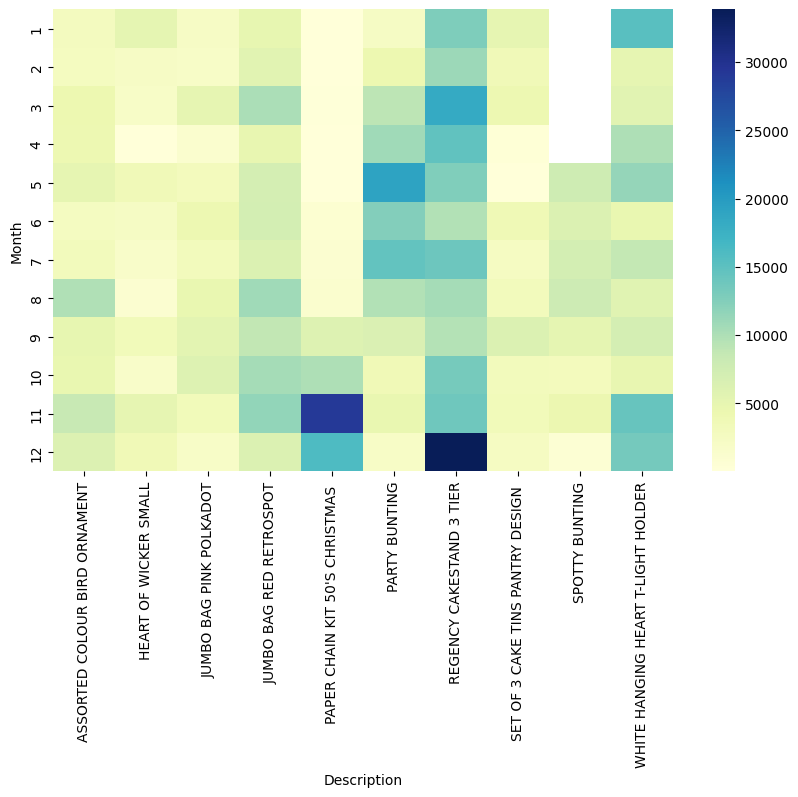

In [69]:
db['Sales']=db['Quantity']*db['UnitPrice']
db = db[db['Sales']>0]
db['Month']=db['InvoiceDate'].dt.month
db5=pd.DataFrame(db.groupby(['Month','Description'])['Sales'].sum()).reset_index(drop=False)
db5
db6=db5.merge(new, on ='Description', how='inner')
db6
data1 = db6[['Month','Description','Sales_x']]

data2 = data1.pivot(index='Month', columns='Description', values='Sales_x')

data2.fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(data2,cmap="YlGnBu")

plt.show()

In [23]:
print("Average number of things bought per order\nAverage number of things bought by cutomers\nAverage number of things bought by customer per invoice or order\nAverage sale value per invoice\nAverage sale value per customer\nAverage sale value per customer per invoice or order")

Average number of things bought per order
Average number of things bought by cutomers
Average number of things bought by customer per invoice or order
Average sale value per invoice
Average sale value per customer
Average sale value per customer per invoice or order


In [24]:
#Average number of things bought per order
n = db3.groupby(['InvoiceNo']).sum('Sales').reset_index()
invoice_analysis = n[['InvoiceNo','Quantity','Sales']]
print("analysis of number of quantities in an invoice\n______________________________________")
print(invoice_analysis['Quantity'].describe())
print("__________________________________________________\nSuch high number of quantites per invoice indicates that this datbase contains bulk order values as well")

analysis of number of quantities in an invoice
______________________________________
count    19857.000000
mean       201.870021
std       1181.079157
min     -80995.000000
25%         31.000000
50%        117.000000
75%        245.000000
max      80995.000000
Name: Quantity, dtype: float64
__________________________________________________
Such high number of quantites per invoice indicates that this datbase contains bulk order values as well


In [25]:
print("analysis of sales of quantities in an invoice\n______________________________________")
print(invoice_analysis['Sales'].describe())

analysis of sales of quantities in an invoice
______________________________________
count     19857.000000
mean        340.830609
std        2054.399323
min     -168469.600000
25%          88.300000
50%         231.950000
75%         397.500000
max      168469.600000
Name: Sales, dtype: float64


In [26]:
p = db3.groupby(['CustomerID','InvoiceNo'])['Sales'].sum().reset_index()
g = db3.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum().reset_index()
m = p.merge(g,on=['CustomerID','InvoiceNo'],how='inner')
m

,CustomerID,InvoiceNo,Sales,Quantity
0,12346.0,541431,77183.60,74215
1,12346.0,C541433,-77183.60,-74215
2,12747.0,537215,358.56,108
3,12747.0,538537,347.71,105
4,12747.0,541677,303.04,88
...,...,...,...,...
19852,18283.0,579673,223.61,134
19853,18283.0,580872,208.00,142
19854,18287.0,554065,765.28,488
19855,18287.0,570715,1001.32,990
